In [28]:
#math
import numpy as np
import random

#dataframes
import pandas as pd

#ploting
import matplotlib.pyplot as plt

#regression tools
import statsmodels.api as sm
from patsy import dmatrices

## Load Dataset

In [29]:
df_orig = pd.read_csv('dataset.csv')
df_orig.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1371493,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1180074,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1064351,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0


## Analysis

In [30]:
# convert date to timestamp object
df = df_orig.copy()
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [31]:
# group by date -> show avgs per month
grouped = df.copy()
grouped['date2'] = grouped['date'].dt.strftime('%Y-%m')
grouped = grouped.groupby('date2')[['energy', 'danceability', 'acousticness', 'liveness', 'valence', 'tempo', 'speechiness', 'instrumentalness', 'tempo', 'loudness', 'streams', 'duration_ms']].mean()
grouped.head()

,energy,danceability,acousticness,liveness,valence,tempo,speechiness,instrumentalness,tempo,loudness,streams,duration_ms
date2,,,,,,,,,,,,
2017-01,0.611649,0.685028,0.202181,0.162219,0.445494,120.397466,0.146051,0.008510,120.397466,-6.664733,293389.057903,224481.505446
2017-02,0.608902,0.688805,0.205938,0.161476,0.426770,121.502076,0.152157,0.007769,121.502076,-6.618574,327855.960893,224697.560846
2017-03,0.595437,0.696631,0.204511,0.161794,0.432271,120.124645,0.150231,0.007824,120.124645,-6.676328,384169.592419,225464.842678
2017-04,0.599622,0.707780,0.174264,0.174119,0.438022,121.504518,0.154183,0.007058,121.504518,-6.767773,393312.837500,225284.767826
2017-05,0.602702,0.709444,0.172472,0.166076,0.452437,121.196648,0.150207,0.006617,121.196648,-6.656012,390063.020345,225126.010900


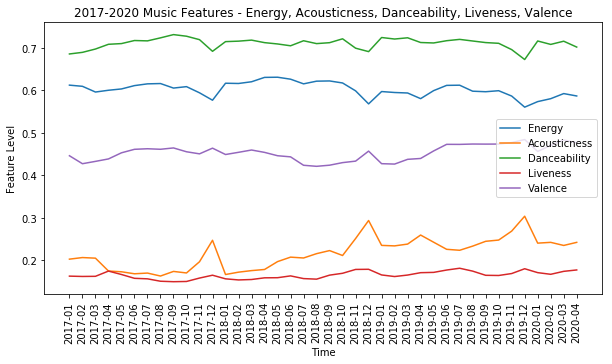

In [38]:
plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['energy'], '-', label = 'Energy')
plt.plot(grouped.index, grouped['acousticness'], '-', label = 'Acousticness')
plt.plot(grouped.index, grouped['danceability'], '-', label = 'Danceability')
plt.plot(grouped.index, grouped['liveness'], '-', label = 'Liveness')
plt.plot(grouped.index, grouped['valence'], '-', label = 'Valence')
plt.legend()
plt.title('2017-2020 Music Features - Energy, Acousticness, Danceability, Liveness, Valence')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('Feature Level')
plt.show()

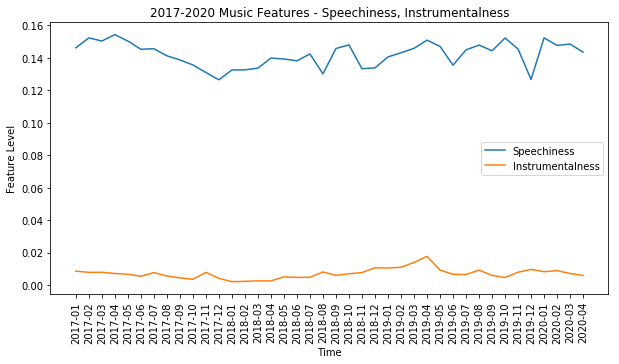

In [33]:
plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['speechiness'], '-', label = 'Speechiness')
plt.plot(grouped.index, grouped['instrumentalness'], '-', label = 'Instrumentalness')
plt.legend()
plt.title('2017-2020 Music Features - Speechiness, Instrumentalness')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('Feature Level')
plt.show()

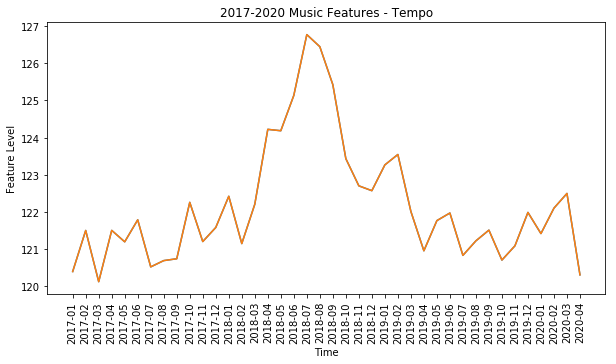

In [34]:
plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['tempo'], '-', label = 'Tempo')
plt.title('2017-2020 Music Features - Tempo')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('Feature Level')
plt.show()

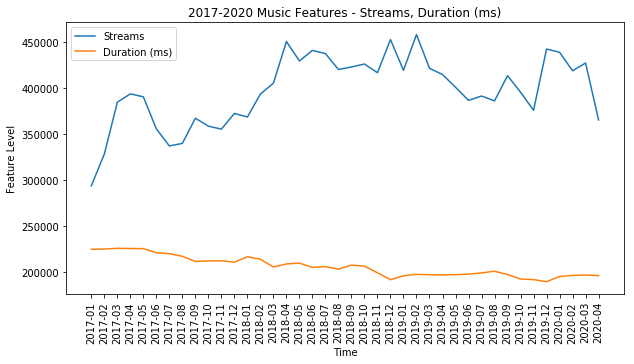

In [36]:
plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['streams'], '-', label = 'Streams')
plt.plot(grouped.index, grouped['duration_ms'], '-', label = 'Duration (ms)')
plt.legend()
plt.title('2017-2020 Music Features - Streams, Duration (ms)')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('Feature Level')
plt.show()

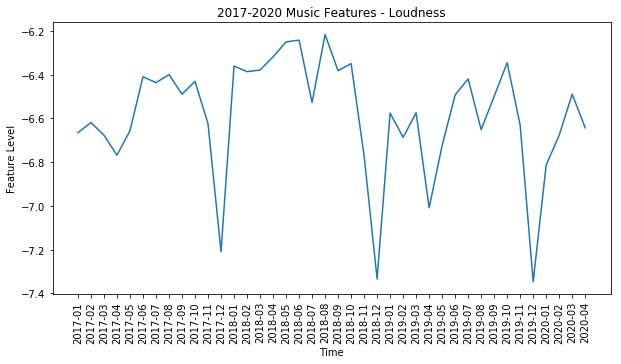

In [37]:
plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['loudness'], '-', label = 'Loudness')
plt.title('2017-2020 Music Features - Loudness')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('Feature Level')
plt.show()